# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

In [ ]:
# Passo 1: Entendimento do problema
# Passo 2: Entendimento da Área/Empresa

#### Importar a Base de dados

In [2]:
# Passo 3: Extração/Obtenção de Dados
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
tabela.info()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


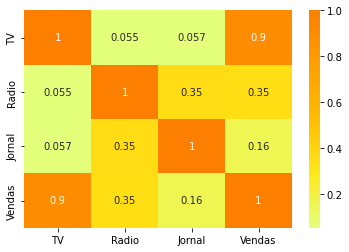

In [4]:
# Passo 5: Análise Exploratória
display(tabela.corr())

import seaborn as sns
import matplotlib.pyplot as plt

# cria o gráfico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

# exibe o gráfico
plt.show()


#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [21]:
# Passo 6: Modelagem + Algoritmos (Aqui entra a inteligência Artificial, se necessário)

# y -> é quem você quer prever
y = tabela["Vendas"]

# x -> quem eu vou usar para prever o y, ou seja, o resto da tabela
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [24]:
# importa ela
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria ela
modelo_regressaolinear = LinearRegression()
modelo_arvorededecisao = RandomForestRegressor()

# treina ela
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvorededecisao.fit(x_treino, y_treino)

print("Modelos treinados")

Modelos treinados


#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [17]:
# Passo 7: Interpretação de Resultados
from sklearn.metrics import r2_score

# fazer as previsoes
previsao_arvoredecisao = modelo_arvorededecisao.predict(x_teste)
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)

# comparar a previsao com o y_teste
print(r2_score(y_teste, previsao_arvoredecisao))
print(r2_score(y_teste, previsao_regressaolinear))

print("Porcentagem de precisão do Modelo Árvore de decisão: %.4f%%" % (r2_score(y_teste, previsao_arvoredecisao)*100))
print("Porcentagem de precisão do Modelo Regressão Linear: %.4f%%" % (r2_score(y_teste, previsao_regressaolinear)*100))

0.964350546640424
0.9071151423684273
Porcentagem de precisão do Modelo Árvore de decisão: 96.4351%
Porcentagem de precisão do Modelo Regressão Linear: 90.7115%


#### Visualização Gráfica das Previsões

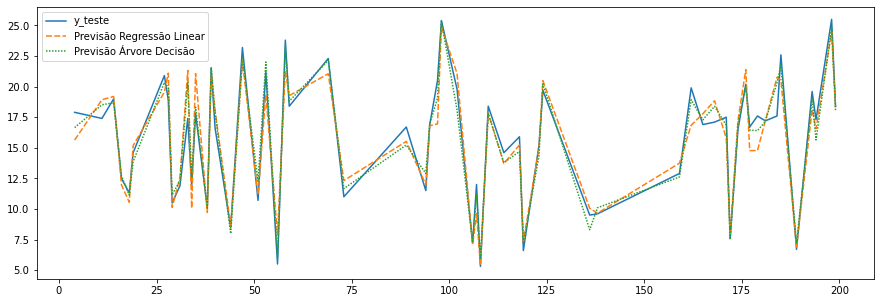

In [8]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar["Previsão Regressão Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsão Árvore Decisão"] = previsao_arvoredecisao

plt.figure(figsize=(15,5))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [14]:
tabela_nova = pd.read_csv("novos.csv")
display(tabela_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [15]:
# criando a previsao de vendas
previsao = modelo_arvorededecisao.predict(tabela_nova)
print(previsao)

[ 7.718  8.693 20.11 ]


In [16]:
# criando uma nova coluna com os valores da previsao de vendas 
tabela_previsao = tabela_nova
tabela_previsao["Previsao Vendas"] = previsao
display(tabela_previsao)

,TV,Radio,Jornal,Previsao Vendas
0,23.1,3.8,69.2,7.718
1,44.5,0.0,5.1,8.693
2,170.2,45.9,0.0,20.110
